# 🧠 Project Summary: Multi-Platform Streaming Analysis
# Objective:
# Identify and visualize the most streamed tracks across three platforms: Spotify, YouTube, and Shazam.

# Steps Included:
# - Load and clean the dataset (spotify-2024.csv)
# - Convert stream counts to numeric values
# - Extract top 10 tracks by:
#     • Spotify streams
#     • YouTube views
#     • Shazam counts
# - Plot the top Spotify tracks

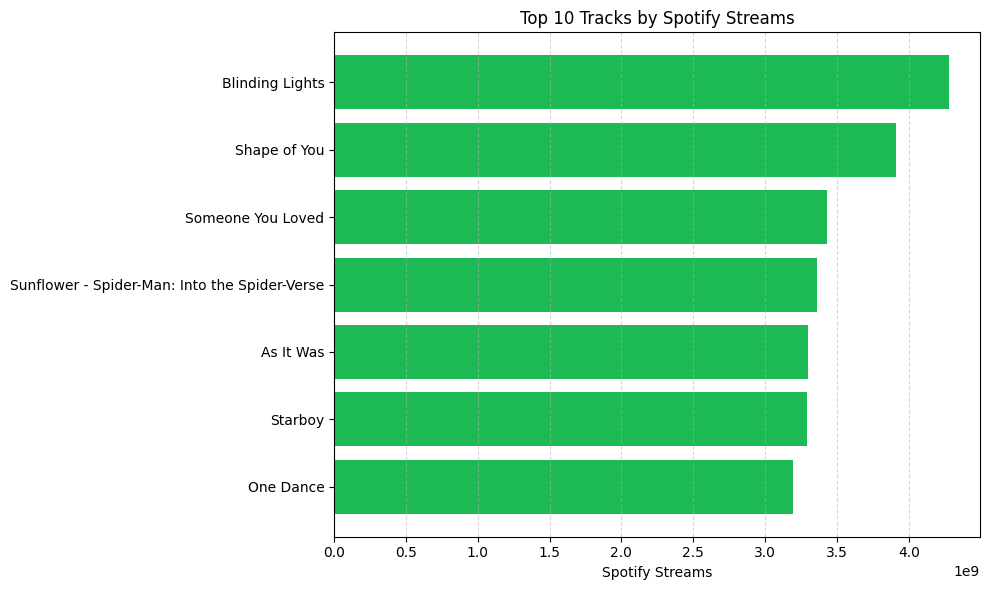

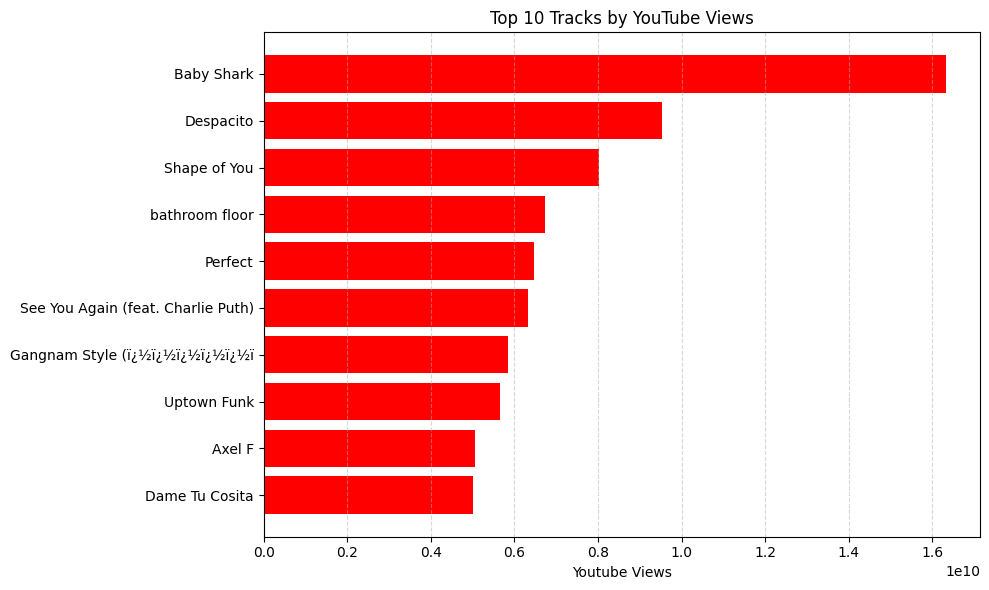

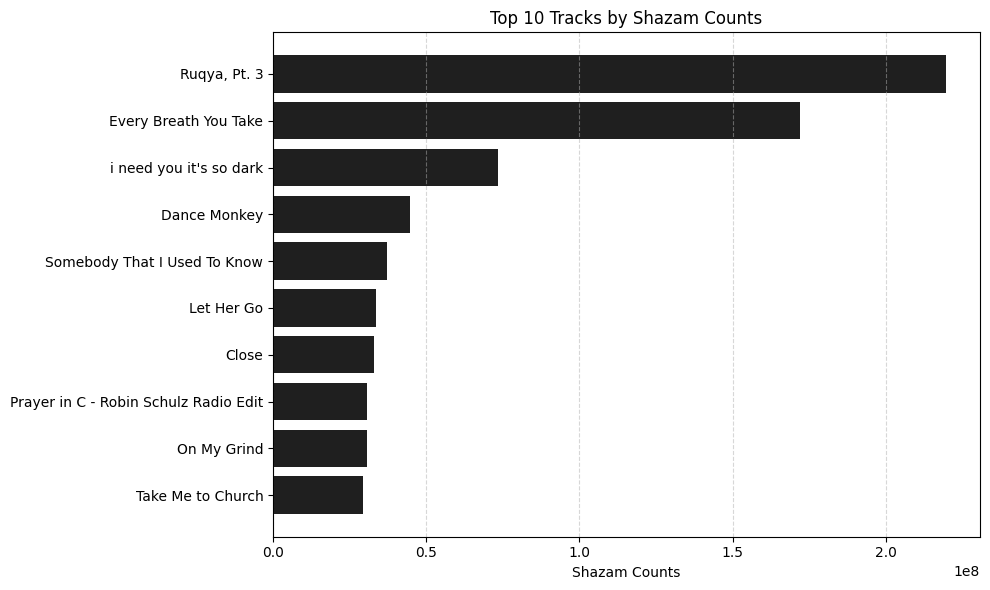

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: File check and load
file_path = "spotify-2024.csv"

if not os.path.isfile(file_path):
    raise FileNotFoundError(f"CSV file not found: {file_path}\nMake sure the file exists in the same folder as this script.")

df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Step 2: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 3: Convert relevant columns to numeric
def clean_numeric(column):
    return df[column].str.replace(",", "").astype(float)

df['spotify_streams'] = clean_numeric('spotify_streams')
df['youtube_views'] = clean_numeric('youtube_views')
df['shazam_counts'] = clean_numeric('shazam_counts')

# Step 4: Extract top 10 tracks per platform
top_spotify = df[['track', 'artist', 'spotify_streams']].sort_values(by='spotify_streams', ascending=False).head(10)
top_youtube = df[['track', 'artist', 'youtube_views']].sort_values(by='youtube_views', ascending=False).head(10)
top_shazam = df[['track', 'artist', 'shazam_counts']].sort_values(by='shazam_counts', ascending=False).head(10)

# Step 5: Plotting
def plot_top_tracks(df_top, value_col, title, color):
    plt.figure(figsize=(10, 6))
    plt.barh(df_top['track'][::-1], df_top[value_col][::-1], color=color)
    plt.xlabel(value_col.replace('_', ' ').title())
    plt.title(title)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Visualizations
plot_top_tracks(top_spotify, 'spotify_streams', "Top 10 Tracks by Spotify Streams", '#1DB954')
plot_top_tracks(top_youtube, 'youtube_views', "Top 10 Tracks by YouTube Views", '#FF0000')
plot_top_tracks(top_shazam, 'shazam_counts', "Top 10 Tracks by Shazam Counts", '#1F1F1F')